#Noções básicas de sintaxe do Keras

No TensorFlow 2.0 o Keras é a principal API. Vamos trabalhar em um projeto de regressão simples para entender os fundamentos da sintaxe do Keras e adição de camadas.

## Os dados

Para aprender a sintaxe básica do Keras, usaremos um conjunto de dados falsos muito simples. Nas aulas subsequentes, focaremos em conjuntos de dados reais. Por enquanto, vamos nos concentrar na sintaxe do TensorFlow 2.0.

Vamos supor que esses dados sejam medições de algumas pedras raras, com 2 recursos de medição e um preço de venda. Nosso objetivo final seria tentar prever o preço de venda de uma nova pedra preciosa que acabamos de extrair do solo, a fim de tentar definir um preço justo no mercado.

### Carregando os Dados

In [1]:
import pandas as pd

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/OLD/IA - OLD/21_ANNs")
os.listdir()

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explorando os dados

Vamos dar uma checada rápida nos dados, devemos ver uma forte correlação entre as características e o "preço" deste dataset inventado.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

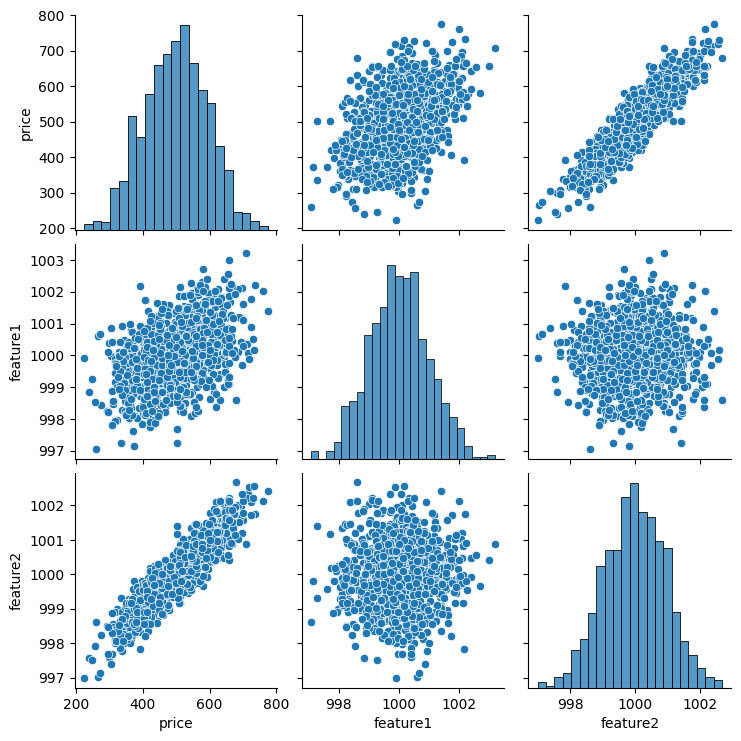

In [5]:
sns.pairplot(df)

Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convertendo o Pandas Dataframe em Numpy Arrays para utilização no Keras

# Características (Features)
X = df[['feature1','feature2']].values

# Rótulo (Label)
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

## Normalizando/dimensionando os dados

Nós normalizamos/dimensionamos os dados das características (features).

[Por que não precisamos dimensionar o rótulo (label)](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |
 |  Transform features by scaling each feature to a given range.
 |
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |
 |  The transformation is given by::
 |
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |
 |  where min, max = feature_range.
 |
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one corresponds to

In [16]:
scaler = MinMaxScaler()

In [17]:
# Aviso: para evitar vazamento de dados do conjunto de teste, apenas ajustamos nosso scaler ao conjunto de treinamento

In [18]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sintaxe TensorFlow 2.0


## Opções de Importação

Existem várias maneiras de importar o Keras através do Tensorflow (essa é uma escolha de estilo extremamente pessoal, use qualquer método de importação de sua preferência). Usaremos o método apresentado na **documentação oficial do TF**.

In [21]:
import tensorflow as tf

In [22]:
from tensorflow import keras
from keras.models import Sequential

In [23]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |
 |  Examples:
 |
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |
 |  # When using the delayed-build pattern (no 

## Criando um modelo

Existem duas maneiras de criar modelos por meio da API do TF 2 Keras: passar uma lista de camadas de uma só vez ou adicioná-las uma a uma.

Vamos mostrar os dois métodos (cabe a você escolher qual método prefere).

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

### Modelo - como uma lista de camadas

In [25]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Modelo - adicionando as camadas uma a uma

In [26]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Vamos construir um modelo simples e, em seguida, compilá-lo definindo nosso solucionador (solver)

In [27]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Nó de saída final
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Escolhendo um otimizador e função de perda

Tenha em mente que tipo de problema você está tentando resolver:

    # Para um problema de classificação multiclasse
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Para um problema de classificação binária
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Para um problema de regressão de erro quadrado médio
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Treinando

Abaixo estão algumas definições comuns que são necessárias conhecer (e entender) para utilizar corretamente o Keras:

* Amostra (Sample): um elemento de um conjunto de dados.
    * Exemplo: uma imagem é uma amostra em uma rede convolucional (convolutional network)
    * Exemplo: um arquivo de áudio é uma amostra para um modelo de reconhecimento de fala

* Lote (Batch): um conjunto de N amostras. As amostras em um lote são processadas de forma independente, em paralelo. Se estiver treinando, um lote resulta em apenas uma atualização para o modelo. Um lote geralmente aproxima a distribuição dos dados de entrada melhor do que uma única entrada. Quanto maior o lote, melhor a aproximação; no entanto, também é verdade que o lote levará mais tempo para ser processado e ainda resultará em apenas uma atualização. Para inferência (avaliar/prever), é recomendável escolher um tamanho de lote que seja o maior possível sem esgotar a memória (já que lotes maiores geralmente resultarão em avaliação/previsão mais rápida).

* Época (Epoch): um corte arbitrário (cutoff), geralmente definido como "uma passagem em todo o conjunto de dados", usado para separar o treinamento em fases distintas, o que é útil para registro e avaliação periódica.

* Ao usar **validation_data** ou **validation_split** com o método **fit** dos modelos Keras, a avaliação será executada no final de cada época (epoch).

* Dentro do Keras, existe a possibilidade de se adicionar callbacks especificamente projetados para serem executados no final de uma época. Exemplos disso são as mudanças na taxa de aprendizado (learning rate changes) e o ponto de verificação do modelo (model checkpointing - saving).

In [28]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 256694.2188
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 256624.1562
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 256554.0312
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 256476.0469
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 256388.7500
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 256291.4219
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 256181.5312
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 256057.4688
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255916.7500
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255754.3594
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255568.5469
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 255361.9219
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255132.2500
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 254876.7031
E

## Avaliação

Vamos avaliar o desempenho do modelo em nosso conjunto de treinamento e nosso conjunto de teste. Podemos comparar esses dois desempenhos para verificar o overfitting.

In [29]:
model.history.history

{'loss': [256694.21875,
  256624.15625,
  256554.03125,
  256476.046875,
  256388.75,
  256291.421875,
  256181.53125,
  256057.46875,
  255916.75,
  255754.359375,
  255568.546875,
  255361.921875,
  255132.25,
  254876.703125,
  254592.59375,
  254275.890625,
  253925.6875,
  253542.515625,
  253124.046875,
  252664.640625,
  252160.453125,
  251615.609375,
  251024.828125,
  250381.921875,
  249686.671875,
  248947.265625,
  248142.234375,
  247277.671875,
  246352.734375,
  245365.140625,
  244314.328125,
  243187.21875,
  241995.109375,
  240717.71875,
  239368.578125,
  237942.515625,
  236431.109375,
  234827.59375,
  233146.421875,
  231372.28125,
  229494.421875,
  227538.921875,
  225475.015625,
  223304.609375,
  221040.921875,
  218672.875,
  216200.28125,
  213610.484375,
  210907.953125,
  208117.875,
  205200.0625,
  202166.28125,
  199010.015625,
  195775.296875,
  192390.015625,
  188885.5,
  185281.21875,
  181533.828125,
  177695.609375,
  173746.5625,
  169679.54687

In [30]:
loss = model.history.history['loss']

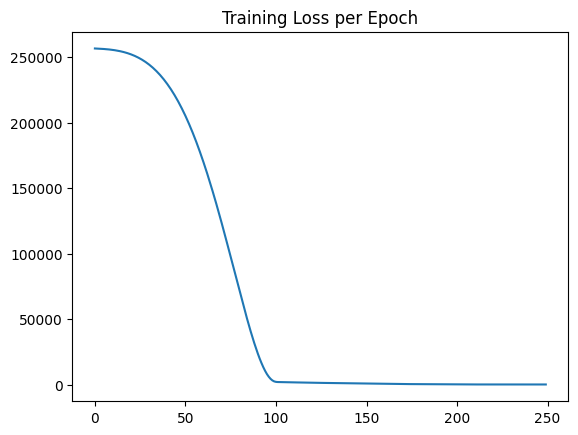

In [31]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Comparando a avaliação final (MSE) no conjunto de treinamento e no conjunto de teste.

In [32]:
model.metrics_names

['loss']

In [33]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [34]:
training_score

24.179950714111328

In [35]:
test_score

26.1882381439209

### Avaliações Adicionais

In [36]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [37]:
test_predictions

array([[406.21802],
       [624.5884 ],
       [593.1197 ],
       [573.346  ],
       [367.7135 ],
       [580.232  ],
       [516.22626],
       [459.99115],
       [550.3489 ],
       [448.3819 ],
       [612.8235 ],
       [549.76526],
       [420.0503 ],
       [409.84454],
       [652.10803],
       [438.1919 ],
       [509.28052],
       [661.16296],
       [663.72375],
       [566.47876],
       [335.21442],
       [445.7959 ],
       [383.51425],
       [379.66028],
       [567.6261 ],
       [611.73364],
       [533.4177 ],
       [428.7833 ],
       [656.6234 ],
       [414.94043],
       [443.5122 ],
       [486.09985],
       [439.347  ],
       [683.01587],
       [425.57324],
       [418.7019 ],
       [502.70642],
       [551.46857],
       [510.86618],
       [396.4607 ],
       [619.59595],
       [417.50784],
       [605.45325],
       [446.77655],
       [502.97473],
       [582.53534],
       [669.92285],
       [491.30457],
       [319.37354],
       [486.41833],


In [38]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [39]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [40]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [41]:
test_predictions

0      406.218018
1      624.588379
2      593.119690
3      573.346008
4      367.713501
          ...    
295    530.126404
296    516.630615
297    610.671265
298    417.800446
299    411.879944
Length: 300, dtype: float32

In [42]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [43]:
pred_df.columns = ['Test Y','Model Predictions']

In [44]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.218018
1,624.156198,624.588379
2,582.455066,593.119690
3,578.588606,573.346008
4,371.224104,367.713501
...,...,...
295,525.704657,530.126404
296,502.909473,516.630615
297,612.727910,610.671265
298,417.569725,417.800446


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

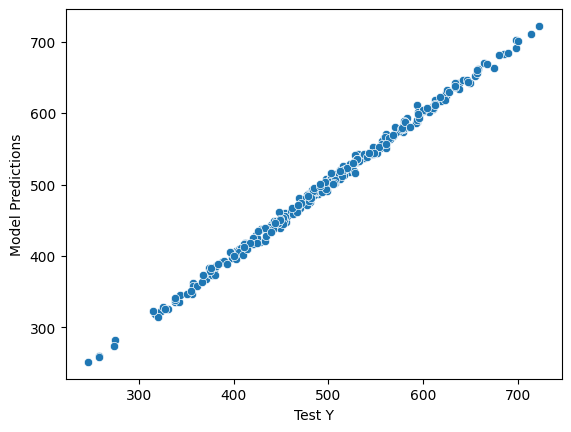

In [45]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [46]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

In [47]:
pred_df

,Test Y,Model Predictions,Error
0,402.296319,406.218018,-3.921699
1,624.156198,624.588379,-0.432180
2,582.455066,593.119690,-10.664624
3,578.588606,573.346008,5.242598
4,371.224104,367.713501,3.510603
...,...,...,...
295,525.704657,530.126404,-4.421747
296,502.909473,516.630615,-13.721142
297,612.727910,610.671265,2.056646
298,417.569725,417.800446,-0.230721


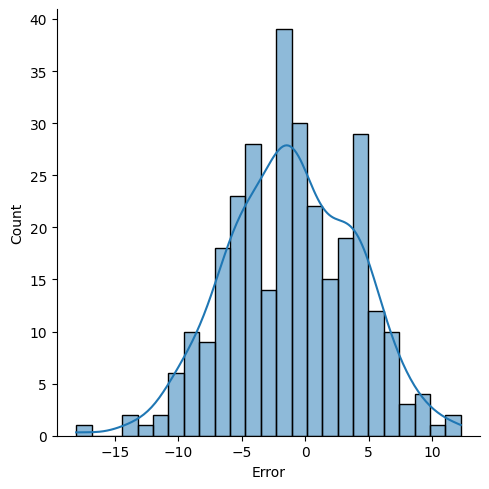

In [48]:
sns.displot(pred_df['Error'],kde=True,bins=25)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.146132442608907

In [51]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.188245124701055

In [52]:
# Essencialmente a mesma coisa, diferença apenas devido à precisão
test_score

26.1882381439209

In [53]:
#RMSE
test_score**0.5

5.117444493487047

# Prevendo em dados novos

E se víssemos uma nova pedra preciosa do chão? Qual deve ser o preço? Este procedimento é **exatamente** igual ao da previsão em novos dados de teste

In [54]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [55]:
# Não esqueça de normalizar!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[420.7995]], dtype=float32)

## Salvando e carregando um modelo

In [58]:
from tensorflow import keras
from keras.models import load_model

In [61]:
model.save('my_model.keras')  # cria um arquivo HDF5 com o nome 'my_model.h5'

In [ ]:
later_model = load_model('my_model.keras')

In [63]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[420.7995]], dtype=float32)